In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
frequencies = np.linspace(1419.9, 1420.1, 4096)

In [5]:
frequencies[:10], len(frequencies)

(array([1419.9       , 1419.90004884, 1419.90009768, 1419.90014652,
        1419.90019536, 1419.9002442 , 1419.90029304, 1419.90034188,
        1419.90039072, 1419.90043956]),
 4096)

In [6]:
file_name = "test_rtl_sdr_at_GBD_in_field_1"
intensity_data = np.fromfile(f"{file_name}.bin", dtype=np.float32)
intensity_data = pd.DataFrame(intensity_data)
intensity_data.rename(columns = {0:'Power [dB]'}, inplace = True)
intensity_data

,Power [dB]
0,-52.672638
1,-52.571938
2,-52.471855
3,-52.518127
4,-52.499180
...,...
4091,-52.641109
4092,-52.422344
4093,-52.175949
4094,-52.541637


In [7]:
max(intensity_data.iloc[:,0])

-13.567787170410156

In [8]:
intensity_data["Frequency [MHz]"] = frequencies
intensity_data

,Power [dB],Frequency [MHz]
0,-52.672638,1419.900000
1,-52.571938,1419.900049
2,-52.471855,1419.900098
3,-52.518127,1419.900147
4,-52.499180,1419.900195
...,...,...
4091,-52.641109,1420.099805
4092,-52.422344,1420.099853
4093,-52.175949,1420.099902
4094,-52.541637,1420.099951


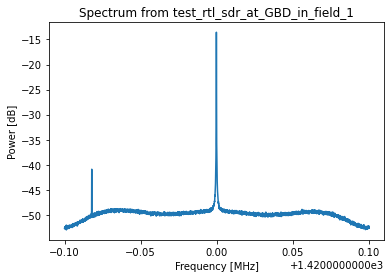

In [13]:
plt.plot(intensity_data.iloc[:,1], intensity_data.iloc[:,0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power [dB]")
plt.title(f"Spectrum from {file_name}")
matplotlib.rc('xtick', labelsize = 16)
plt.savefig(f"{file_name}.png", dpi = 600)